In [1]:
# install datasets
! pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 15.4 MB/s eta 0:00:00


In [2]:
from datasets import list_datasets, load_dataset
from pprint import pprint

# Downloading and loading a dataset
dataset = load_dataset('Kili/plastic_in_river', split='validation[:10%]')

Generating train split:   0%|          | 0/3407 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/427 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/425 [00:00<?, ? examples/s]

Dataset plastic_in_river downloaded and prepared to /root/.cache/huggingface/datasets/Kili___plastic_in_river/default/1.3.0/9f50c1fffe85018c95137b17f0e5a271be58507e17e7a3f3a4075f763c20b8de. Subsequent calls will reuse this data.


In [3]:
# Informations on the dataset (description, citation, size, splits, format...)
# are provided in `dataset.info` (a simple python dataclass) and also as direct attributes in the dataset object
pprint(dataset.info)

DatasetInfo(description='\n'
                        '    This dataset contains photos of rivers on which '
                        'there may be waste. The waste items are annotated\n'
                        '    through bounding boxes, and are assigned to one '
                        'of the 4 following categories: plastic bottle, '
                        'plastic bag,\n'
                        '    another plastic waste, or non-plastic waste. Note '
                        'that some photos may not contain any waste.\n',
            citation='',
            homepage='',
            license='',
            features={'image': Image(decode=True, id=None),
                      'litter': Sequence(feature={'bbox': Sequence(feature=Value(dtype='float32',
                                                                                 id=None),
                                                                   length=4,
                                                                  

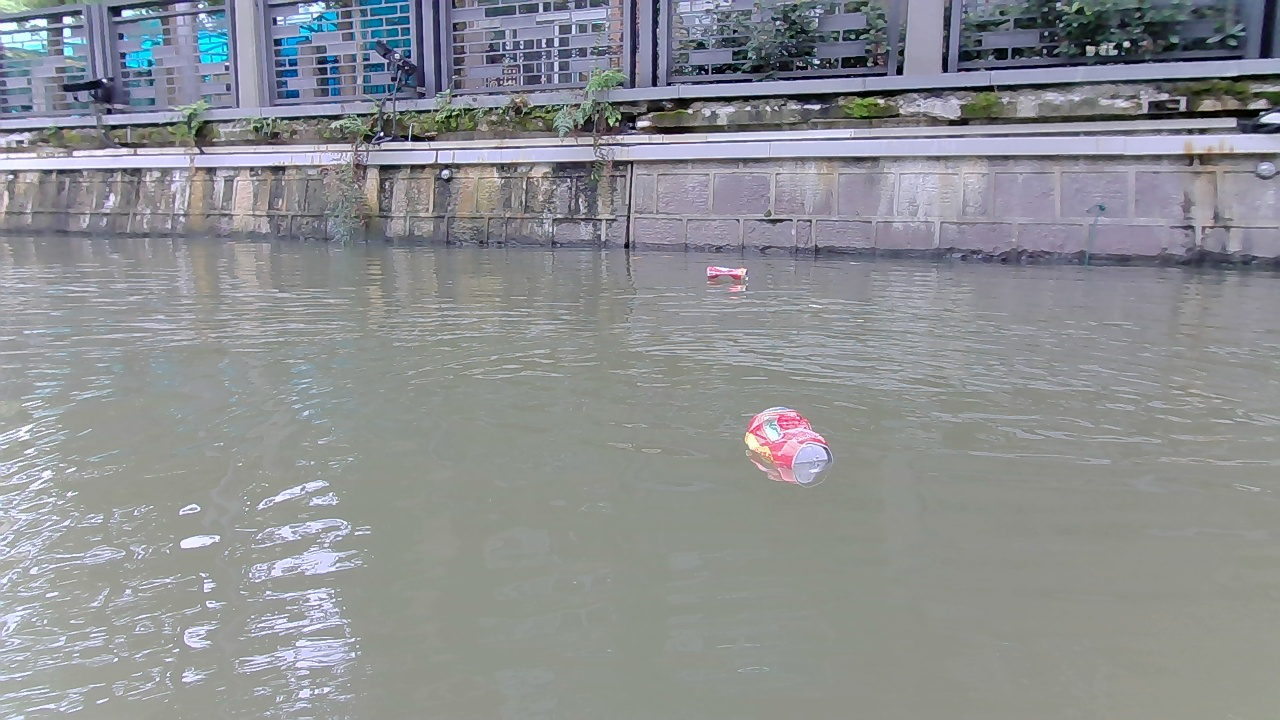

In [4]:
# Images are loaded using Pillow
dataset['image'][10]

In [5]:
# bbox are stored as [x_center, y_center, width, height]
# yolo format (https://albumentations.ai/docs/getting_started/bounding_boxes_augmentation/)
dataset['litter'][10]

{'label': [3, 3],
 'bbox': [[0.6164447069168091,
   0.6029766798019409,
   0.06980399042367935,
   0.08468712866306305],
  [0.5690440535545349,
   0.3828740119934082,
   0.03631694242358208,
   0.03186248242855072]]}

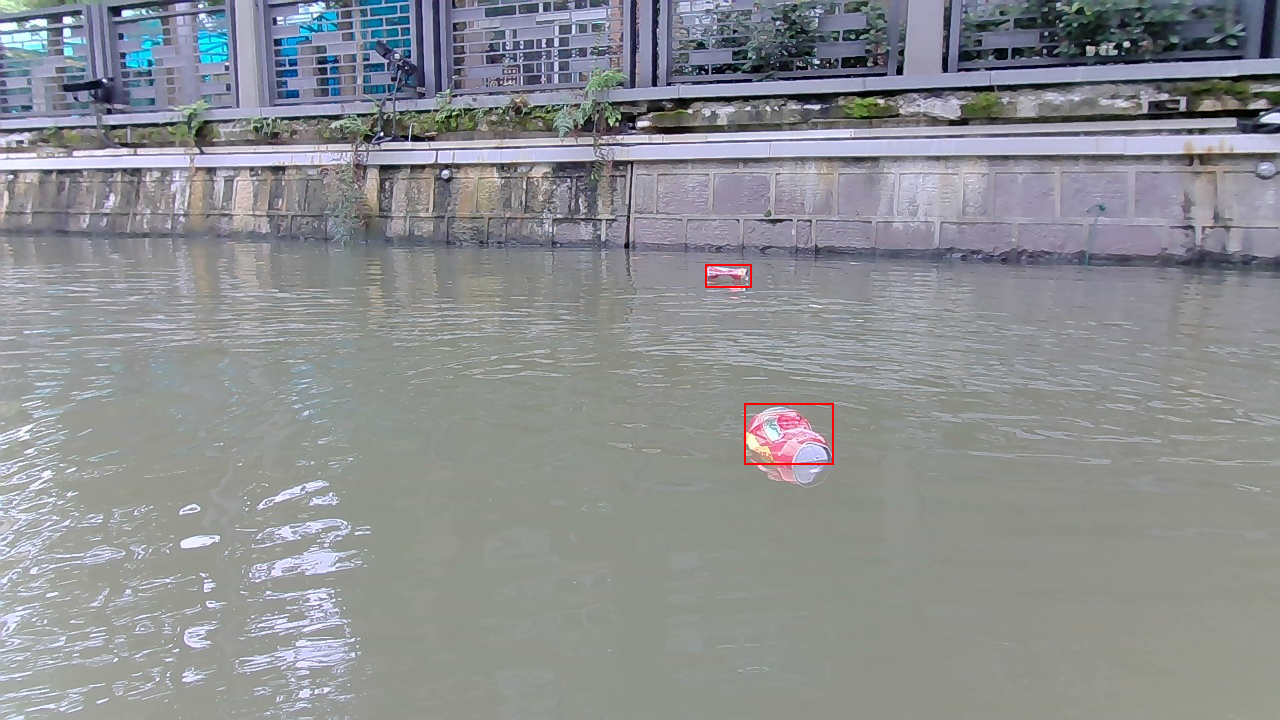

In [7]:
# Explore the dataset 
from PIL import Image, ImageDraw

idx = 10

# Carica l'immagine
image = dataset['image'][idx]

# Crea un oggetto ImageDraw per disegnare sulla tua immagine
draw = ImageDraw.Draw(image)

# Estrai le informazioni sulle bounding box dal dataset
bounding_boxes = dataset['litter'][idx]

# Disegna le bounding box sull'immagine
for bbox in bounding_boxes['bbox']:
    x_center, y_center, width, height = bbox  # Estrai le coordinate e le dimensioni
    left = (x_center - width / 2) * image.width
    top = (y_center - height / 2) * image.height
    right = (x_center + width / 2) * image.width
    bottom = (y_center + height / 2) * image.height
    draw.rectangle([(left, top), (right, bottom)], outline="red", width=2)

# Mostra l'immagine con le bounding box
image.show()

**TODO:** aggiungere l'informazione della classe corrispondente ['PLASTIC_BAG',
'PLASTIC_BOTTLE',
'OTHER_PLASTIC_WASTE',
'NOT_PLASTIC_WASTE'] affinaco alla bbox